In [72]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer


In [2]:
# Load the data
bike_data = pd.read_csv("../data/bikes.csv")

In [3]:
bike_data.head()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601


In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  657 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [6]:
# Get median for feel_temp
median_feel_temp = bike_data['feel_temperature'].median()

# Fill missing values in feel_temperature with the median
bike_data['feel_temperature'] = bike_data['feel_temperature'].fillna(median_feel_temp)

In [8]:
# Fill missing values in season column by padding
bike_data['season'] = bike_data['season'].interpolate(method = 'pad')

In [12]:
# bike_data.weather_code.unique()
bike_data['weather_code'].unique()

array(['broken_clouds', 'clear', 'scattered_clouds', 'rain', nan,
       'cloudy', 'snowfall'], dtype=object)

In [14]:
bike_data.head(10)

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
5,09/01/2015,13.00,13.00,75.75,32.916667,broken_clouds,False,False,winter,22104
6,10/01/2015,11.50,11.50,66.75,34.312500,broken_clouds,False,True,winter,14709
7,11/01/2015,7.75,3.75,69.00,26.562500,clear,False,True,winter,14575
8,12/01/2015,11.50,11.50,76.50,28.187500,rain,False,False,winter,17199
9,13/01/2015,9.00,6.00,74.75,21.208333,rain,False,False,winter,24697


In [15]:
bike_data.select_dtypes(include='object')

,date,weather_code,season
0,04/01/2015,broken_clouds,winter
1,05/01/2015,broken_clouds,winter
2,06/01/2015,clear,winter
3,07/01/2015,scattered_clouds,winter
4,08/01/2015,rain,winter
...,...,...,...
725,30/12/2016,cloudy,winter
726,31/12/2016,cloudy,winter
727,01/01/2017,rain,winter
728,02/01/2017,clear,winter


In [43]:
# Fetch the season data as a new df
season_data = pd.DataFrame(bike_data['season'], columns=['season'])

# Create a one-hot encoder object
one_hot_encoder = OneHotEncoder()

# One-hot encode the season column
ohe_array = one_hot_encoder.fit_transform(season_data[['season']]).toarray()

# Get column names
col_names = one_hot_encoder.get_feature_names_out(['season'])

# Convert the array into a dataframe
ohe_season_data = pd.DataFrame(data = ohe_array, columns=col_names)

# Concatenate unencoded and OHE-data to compare
season_data = pd.concat([season_data, ohe_season_data], axis=1)

In [44]:
# x = pd.DataFrame([1,2,3,4], columns=['s'])
# y = [x['s']]

In [45]:
# type(y)

In [46]:
season_data.sample(7)

,season,season_autumm,season_spring,season_summer,season_winter
348,winter,0.0,0.0,0.0,1.0
661,autumm,1.0,0.0,0.0,0.0
139,spring,0.0,1.0,0.0,0.0
419,winter,0.0,0.0,0.0,1.0
265,autumm,1.0,0.0,0.0,0.0
22,winter,0.0,0.0,0.0,1.0
380,winter,0.0,0.0,0.0,1.0


In [27]:
# season_data['season'].unique()

In [26]:
# ohe_array

In [47]:
# season_data

In [48]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


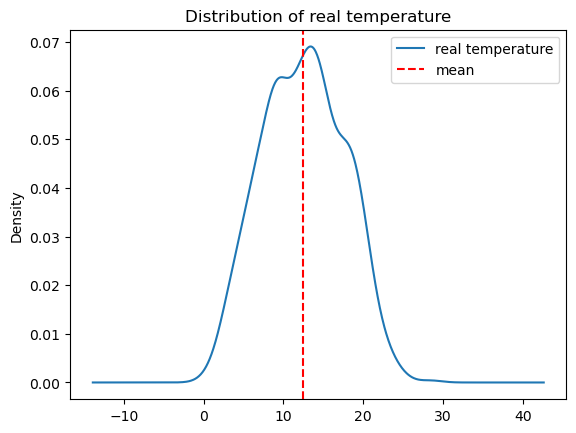

In [56]:
# Create a density plot to visualise distribution of real_temp
ax = bike_data['real_temperature'].plot.density(title='Distribution of real temperature', label='real temperature')

# Get the column mean
mean_real_temp = bike_data['real_temperature'].mean()

# Plot the column mean
plt.axvline(x=mean_real_temp, color='red', linestyle='dashed', label='mean')
ax.legend();

### Data Standardisation

In [60]:
# Create a standard scaler object
std_scaler = StandardScaler()

# Standardise the real temperature column
bike_data['scaled_real_temp'] = std_scaler.fit_transform(X=bike_data[['real_temperature']])

In [67]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
 10  scaled_real_temp  730 non-null    float64
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 52.9+ KB


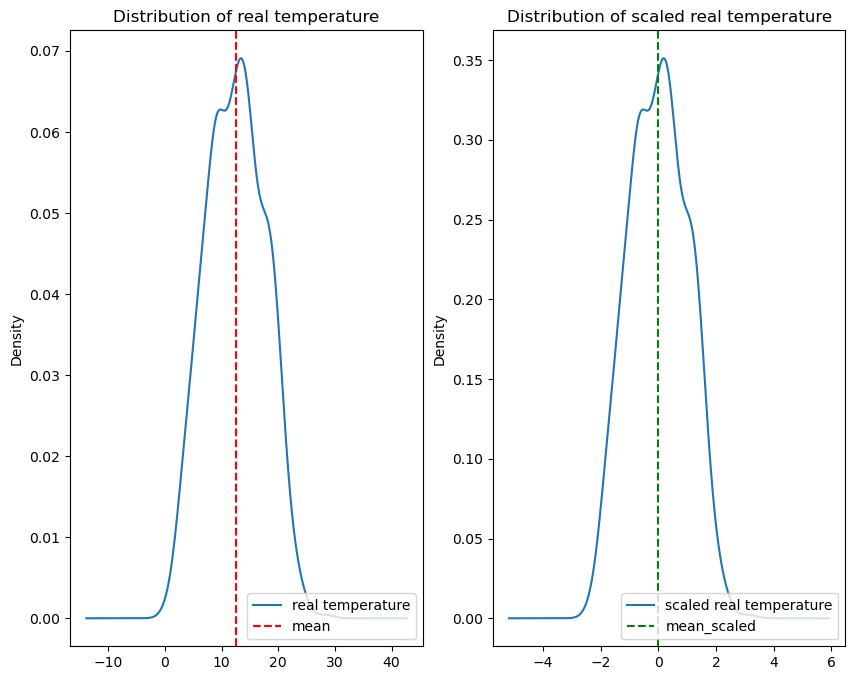

In [71]:
# Create a figure object for the distro plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8))

# Create a density plot to visualise distribution of real_temp
bike_data['real_temperature'].plot.density(ax = ax1, title='Distribution of real temperature', label='real temperature')

# Get the column mean
mean_real_temp = bike_data['real_temperature'].mean()

# Plot the column mean
ax1.axvline(x=mean_real_temp, color='red', linestyle='dashed', label='mean')
ax1.legend(loc='lower right');

# Create a density plot to visualise distribution of scaled real_temp
bike_data['scaled_real_temp'].plot.density(ax=ax2, title='Distribution of scaled real temperature', label='scaled real temperature')

# Get the column mean
mean_scaled_real_temp = bike_data['scaled_real_temp'].mean()

# Plot the column mean
ax2.axvline(x=mean_scaled_real_temp, color='g', linestyle='--', label='mean_scaled')
ax2.legend(loc='lower right');

### Composite transformation using ColumnTransformer

In [74]:
bike_data.head()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count,scaled_real_temp
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234,-1.914593
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372,-0.685001
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613,-0.881736
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064,-0.685001
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601,-0.685001


In [79]:
# Create a column transformer object
# column_transformer = make_column_transformer()
column_transform = make_column_transformer(
    (bike_data['real_temperature'], StandardScaler()),
    (bike_data['season'], OneHotEncoder())
)

column_transform

ColumnTransformer(transformers=[('series-1',
                                 0      2.75
1      9.00
2      8.00
3      9.00
4      9.00
       ... 
725    4.00
726    7.50
727    7.00
728    3.25
729    4.50
Name: real_temperature, Length: 730, dtype: float64,
                                 StandardScaler()),
                                ('series-2',
                                 0      winter
1      winter
2      winter
3      winter
4      winter
        ...  
725    winter
726    winter
727    winter
728    winter
729    winter
Name: season, Length: 730, dtype: object,
                                 OneHotEncoder())])

### Feature selection

In [85]:
# Create a correlation matrix for the numerical variables
num_variables = bike_data.select_dtypes(include='number')

# Create a correlation matrix
corr_matrix = num_variables.corr()

# Make a heatmap out of the corr_matrix
corr_matrix.style.background_gradient(cmap='coolwarm') #.set_precision(2)

,real_temperature,feel_temperature,humidity,wind_speed,count,scaled_real_temp
real_temperature,1.000000,0.931534,-0.373399,0.045599,0.669005,1.000000
feel_temperature,0.931534,1.000000,-0.335451,0.012961,0.636596,0.931534
humidity,-0.373399,-0.335451,1.000000,-0.191216,-0.539293,-0.373399
wind_speed,0.045599,0.012961,-0.191216,1.000000,-0.197499,0.045599
count,0.669005,0.636596,-0.539293,-0.197499,1.000000,0.669005
scaled_real_temp,1.000000,0.931534,-0.373399,0.045599,0.669005,1.000000


In [82]:
num_variables.head()

,real_temperature,feel_temperature,humidity,wind_speed,count,scaled_real_temp
0,2.75,0.00,93.00,7.500000,9234,-1.914593
1,9.00,7.25,81.50,8.854167,20372,-0.685001
2,8.00,5.75,79.75,16.000000,20613,-0.881736
3,9.00,5.50,81.00,19.760870,21064,-0.685001
4,9.00,6.75,79.50,20.479167,15601,-0.685001
